In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\Riccardo De Cesaris\AppData\Local\Temp\ipykernel_24316\2813503548.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
schema_mediato = pd.read_csv("../datasets/MediatedSchemaSemicolon.csv",sep=";")
schema_mediato

,name,location,marketCap,sharePrice,category,foundationYear
0,Lacework,"United States, San Jose",$8.3B,NaN,Cybersecurity,2015
1,Tipalti,"United States, San Mateo",$8.3B,NaN,Fintech,2010
2,Tempus,"United States, Chicago",$8.1B,NaN,Health,2015
3,Anduril,"United States, Irvine",$8.48B,NaN,Artificial intelligence,2017
4,Bolt,"Estonia, Tallinn",$8.4B,NaN,Auto & transportation,2013
...,...,...,...,...,...,...
81701,PepsiCo,"Purchase, NY, United States",$241.05 Billion,NaN,NaN,NaN
81702,Costco,"Issaquah, WA, United States",$258.15 Billion,NaN,NaN,NaN
81703,Broadcom,"San Jose, CA, United States",$265.27 Billion,NaN,NaN,NaN
81704,Coca-Cola,"Atlanta, GA, United States",$273.20 Billion,NaN,NaN,NaN


In [3]:
records = []
for i in range(0, len(schema_mediato)):
    r = schema_mediato.iloc[i].dropna()
    records.append(r.to_list())
print("Totale Record:", len(records))

Totale Record: 81706


In [4]:
model = Word2Vec(sentences=records, vector_size=256, window=5, min_count=1, workers=8)

In [5]:
def calculate_vector(record):
    # Inizializza un vettore vuoto
    record_vector = np.zeros(model.vector_size)
    # Somma i vettori di embedding di ciascun token nel record
    for token in record:
        record_vector += model.wv[token]
    # Normalizza il vettore risultante
    record_vector /= 100
    return record_vector

In [8]:
records_w2v = list()
for i in range(0, len(records)):
    record_vec = calculate_vector(records[i])
    records_w2v.append(record_vec)

In [10]:
df = pd.DataFrame(records_w2v)
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.006706,-0.006459,-0.004245,0.002236,0.010891,0.002395,0.003370,0.001684,-0.004749,0.005650,...,0.003508,0.002864,0.001580,-0.003515,-0.002633,-0.000323,-0.005252,0.003481,-0.007311,0.001180
1,0.010235,-0.008957,-0.005220,0.002715,0.014679,0.004180,0.004159,0.002779,-0.005760,0.006037,...,0.006108,0.003983,0.001696,-0.004300,-0.003026,-0.000542,-0.006529,0.004138,-0.009491,0.001486
2,0.008051,-0.007716,-0.005300,0.002656,0.013002,0.003045,0.003908,0.001927,-0.005843,0.007009,...,0.003743,0.003353,0.002080,-0.004408,-0.003445,-0.000435,-0.006667,0.004506,-0.008730,0.001530
3,0.006259,-0.005438,-0.003359,0.001793,0.009134,0.002337,0.002687,0.001650,-0.003515,0.003825,...,0.003719,0.002364,0.001149,-0.002631,-0.001892,-0.000161,-0.004112,0.002619,-0.005678,0.000971
4,0.006085,-0.005645,-0.003315,0.002002,0.009241,0.002041,0.002854,0.001509,-0.003874,0.004507,...,0.003250,0.002422,0.001215,-0.002876,-0.002111,-0.000078,-0.004378,0.002680,-0.006188,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81701,0.000493,-0.000383,-0.000037,0.000092,0.000525,0.000172,0.000153,0.000182,-0.000129,0.000052,...,0.000483,0.000127,0.000031,-0.000114,-0.000062,-0.000008,-0.000140,0.000036,-0.000255,0.000072
81702,0.000253,-0.000169,-0.000045,0.000017,0.000240,0.000143,0.000054,0.000127,-0.000011,0.000096,...,0.000220,0.000081,-0.000078,-0.000001,-0.000011,0.000012,0.000002,0.000057,-0.000121,0.000044
81703,0.001181,-0.000853,-0.000267,0.000261,0.001341,0.000374,0.000330,0.000377,-0.000225,0.000079,...,0.000950,0.000358,-0.000011,-0.000119,-0.000117,-0.000024,-0.000315,0.000049,-0.000757,0.000063
81704,0.001112,-0.000820,-0.000172,0.000322,0.001269,0.000351,0.000330,0.000325,-0.000272,0.000109,...,0.000947,0.000348,-0.000061,-0.000205,-0.000039,-0.000004,-0.000254,0.000011,-0.000693,0.000072


# Test sul Clustering

In [17]:
numbers = np.linspace(start=250, stop=4000, num=17, dtype=np.int32)
numbers = numbers.tolist()

[250,
 484,
 718,
 953,
 1187,
 1421,
 1656,
 1890,
 2125,
 2359,
 2593,
 2828,
 3062,
 3296,
 3531,
 3765,
 4000]

In [19]:
silhouette_scores = list()

In [20]:
from datetime import datetime

In [32]:
for n in numbers:
    kmeans = KMeans(n_clusters=n, random_state=24, init='k-means++')
    print("Inizio addestramento K-Means++ con " + str(n) + " cluster...")
    start = datetime.now()
    kmeans.fit(df)
    end = datetime.now()

    print("Fine addestramento K-Means++ con " + str(n) + " cluster!")
    print("Tempo Necessario:", str(end-start))
    sil_score = silhouette_score(df, kmeans.labels_)
    print("Silhouette Score:", sil_score)
    silhouette_scores.append(sil_score)
    print()

Inizio addestramento K-Means++ con 250 cluster...
Fine addestramento K-Means++ con 250 cluster!
Tempo Necessario: 0:00:06.527594
Silhouette Score: 0.3856812382264929

Inizio addestramento K-Means++ con 484 cluster...
Fine addestramento K-Means++ con 484 cluster!
Tempo Necessario: 0:00:11.625003
Silhouette Score: 0.3473733529364983

Inizio addestramento K-Means++ con 718 cluster...
Fine addestramento K-Means++ con 718 cluster!
Tempo Necessario: 0:00:17.759971
Silhouette Score: 0.31571502026112347

Inizio addestramento K-Means++ con 953 cluster...
Fine addestramento K-Means++ con 953 cluster!
Tempo Necessario: 0:00:22.875001
Silhouette Score: 0.2958257176400705

Inizio addestramento K-Means++ con 1187 cluster...
Fine addestramento K-Means++ con 1187 cluster!
Tempo Necessario: 0:00:27.820970
Silhouette Score: 0.2865568898411671

Inizio addestramento K-Means++ con 1421 cluster...
Fine addestramento K-Means++ con 1421 cluster!
Tempo Necessario: 0:00:34.585968
Silhouette Score: 0.27233125024

In [33]:
import matplotlib.pyplot as plt

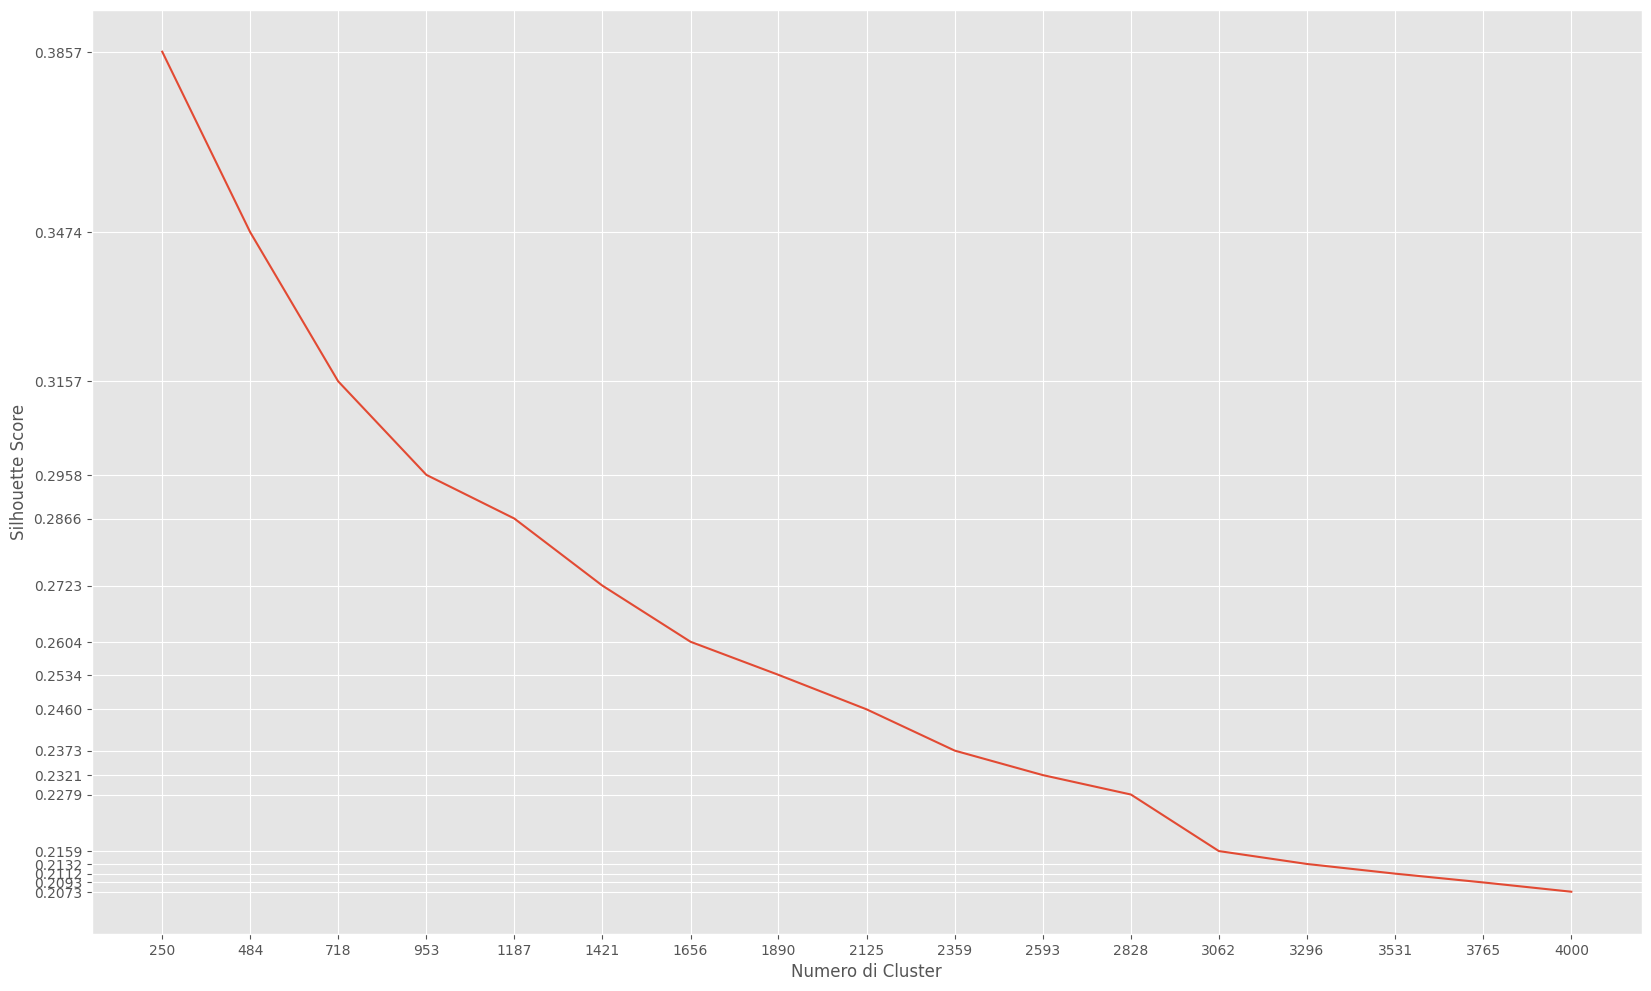

In [37]:
plt.figure(figsize=(20,12))
plt.style.use('ggplot')
plt.plot(numbers, silhouette_scores, linestyle='-')
plt.xlabel('Numero di Cluster')
plt.xticks(numbers)
plt.ylabel('Silhouette Score')
plt.yticks(silhouette_scores)
plt.show()

In [36]:
results = pd.DataFrame(columns=['Numero Cluster', 'Silhouette Score'])
results['Numero Cluster'] = numbers
results['Silhouette Score'] = silhouette_scores
results.to_csv("./clustering_experiments.csv", index=False)